In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import config as cfg
import seaborn as sns
from data import hf_data, t_data

# Heart Failure Dataset

## Sparsity

<Figure size 600x450 with 0 Axes>

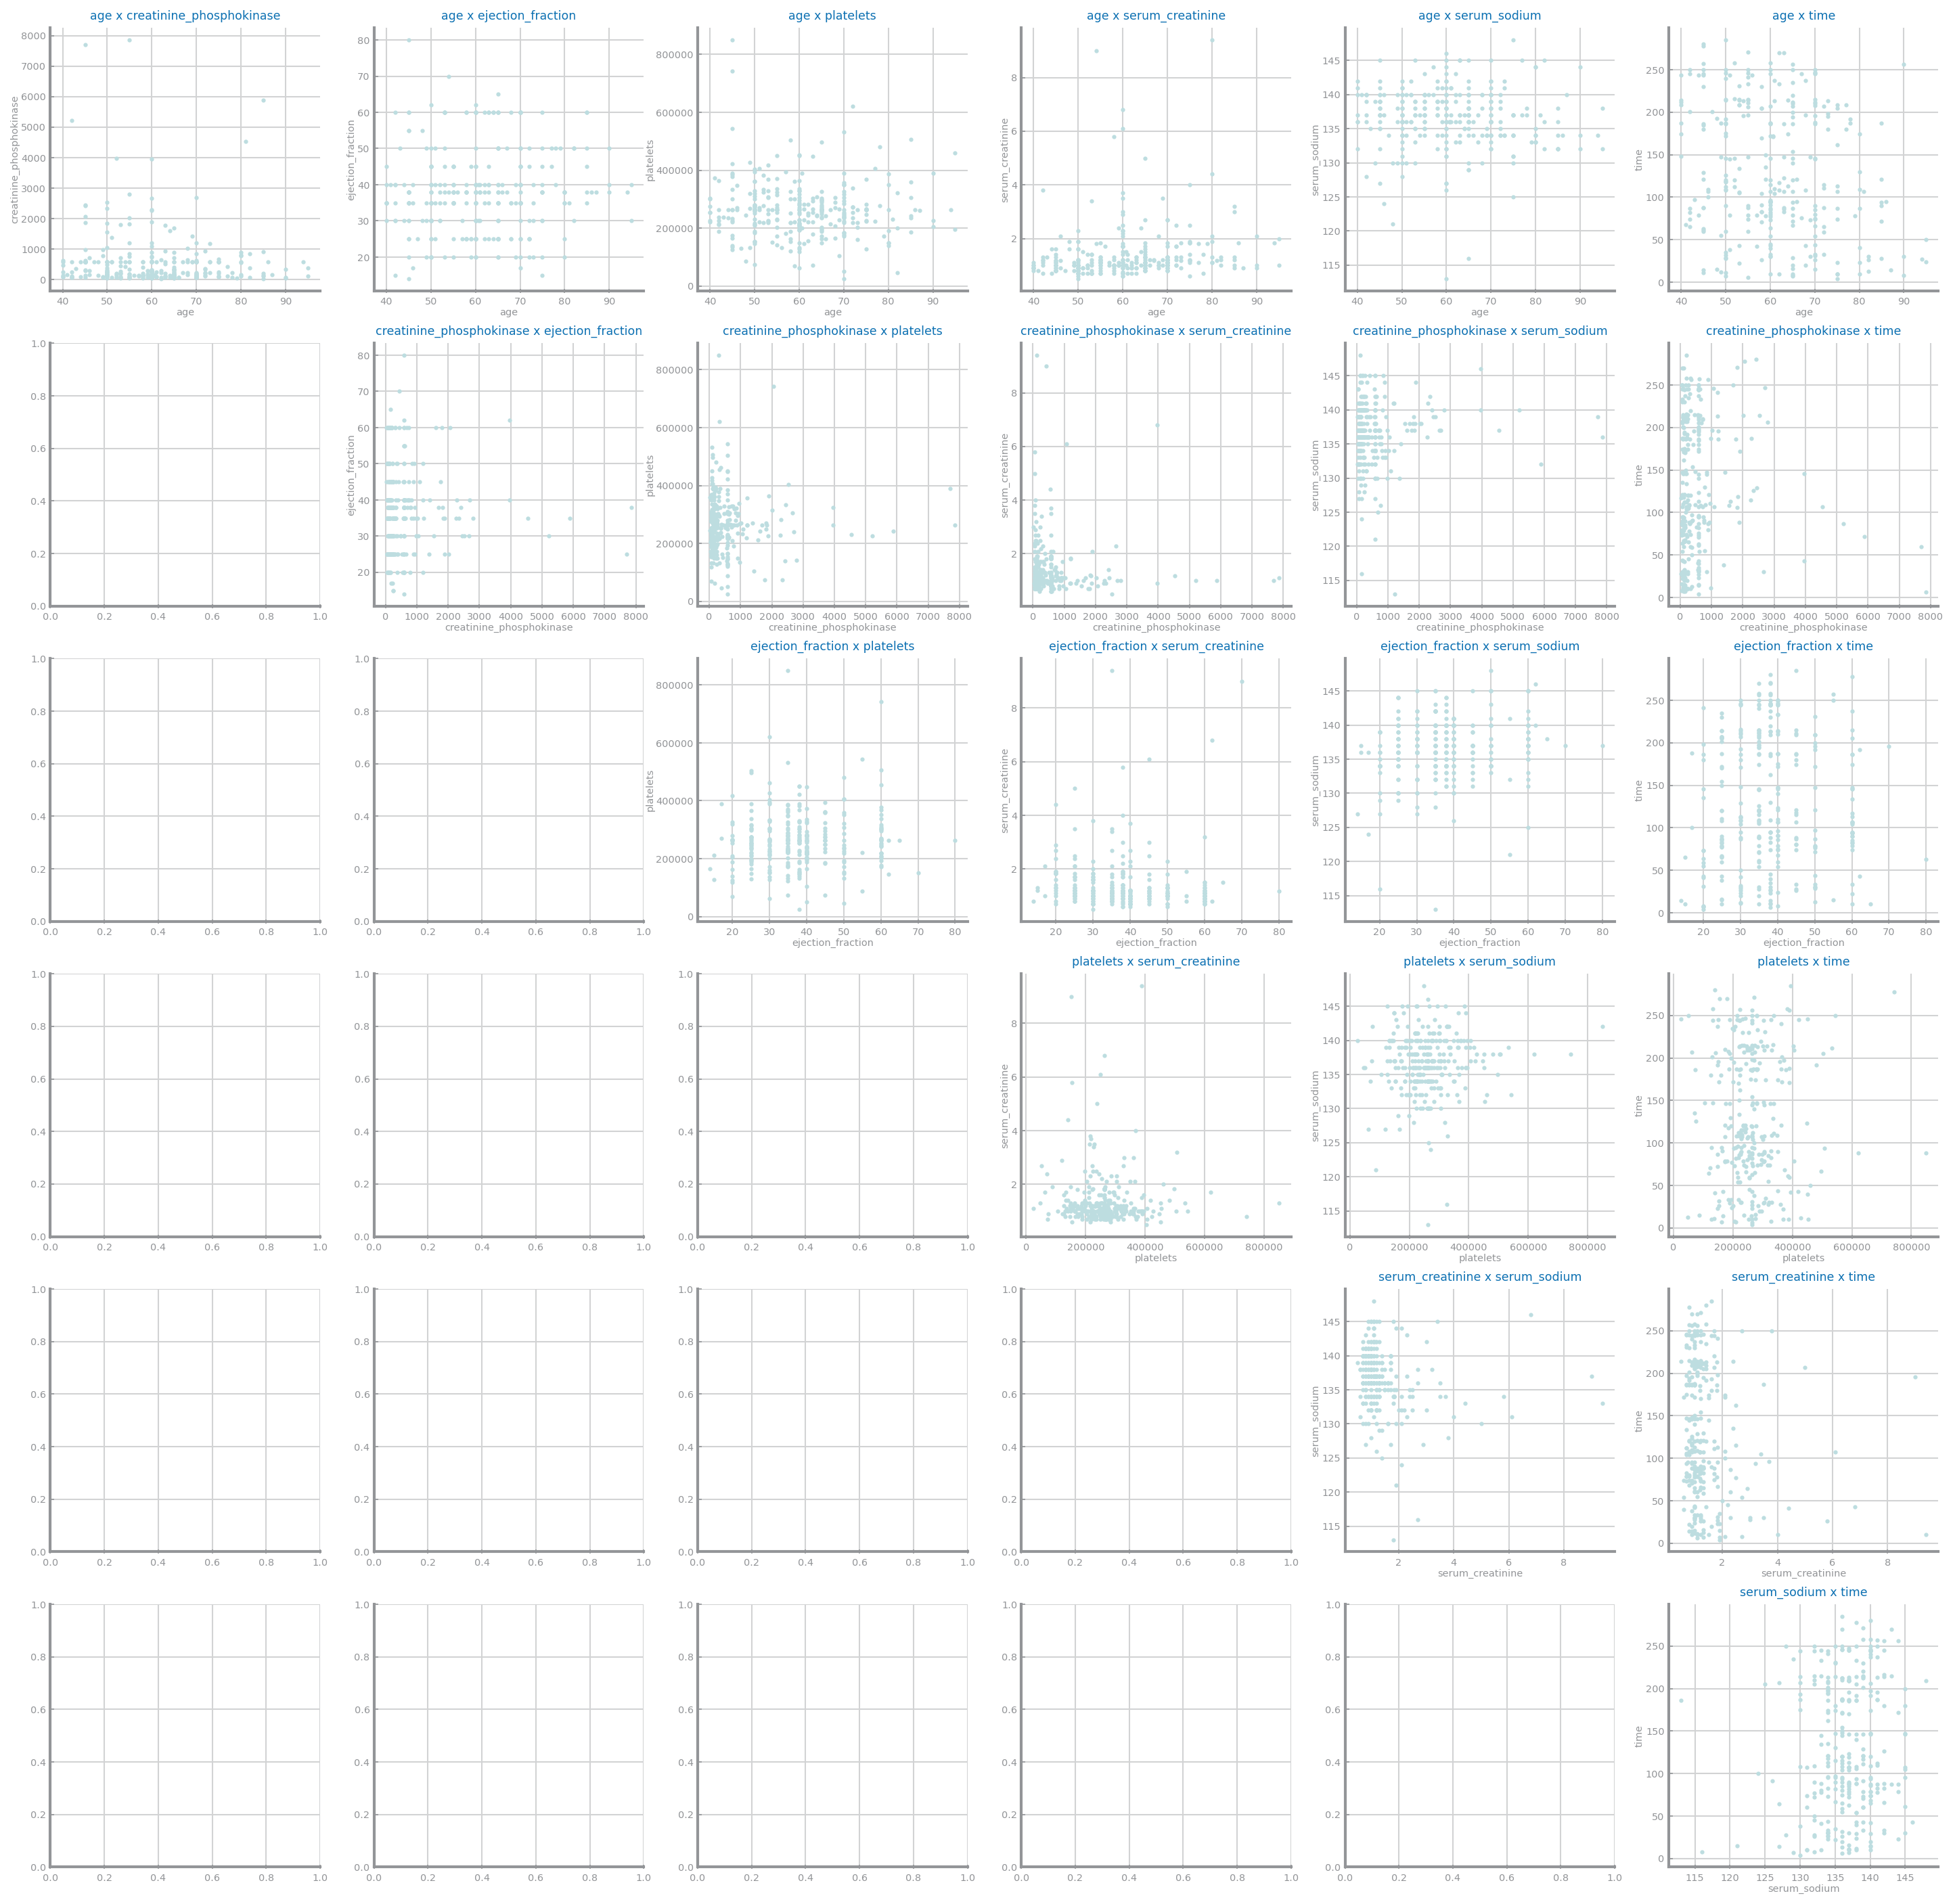

In [2]:
columns = hf_data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(hf_data[var1], hf_data[var2])
plt.show()

## Correlation

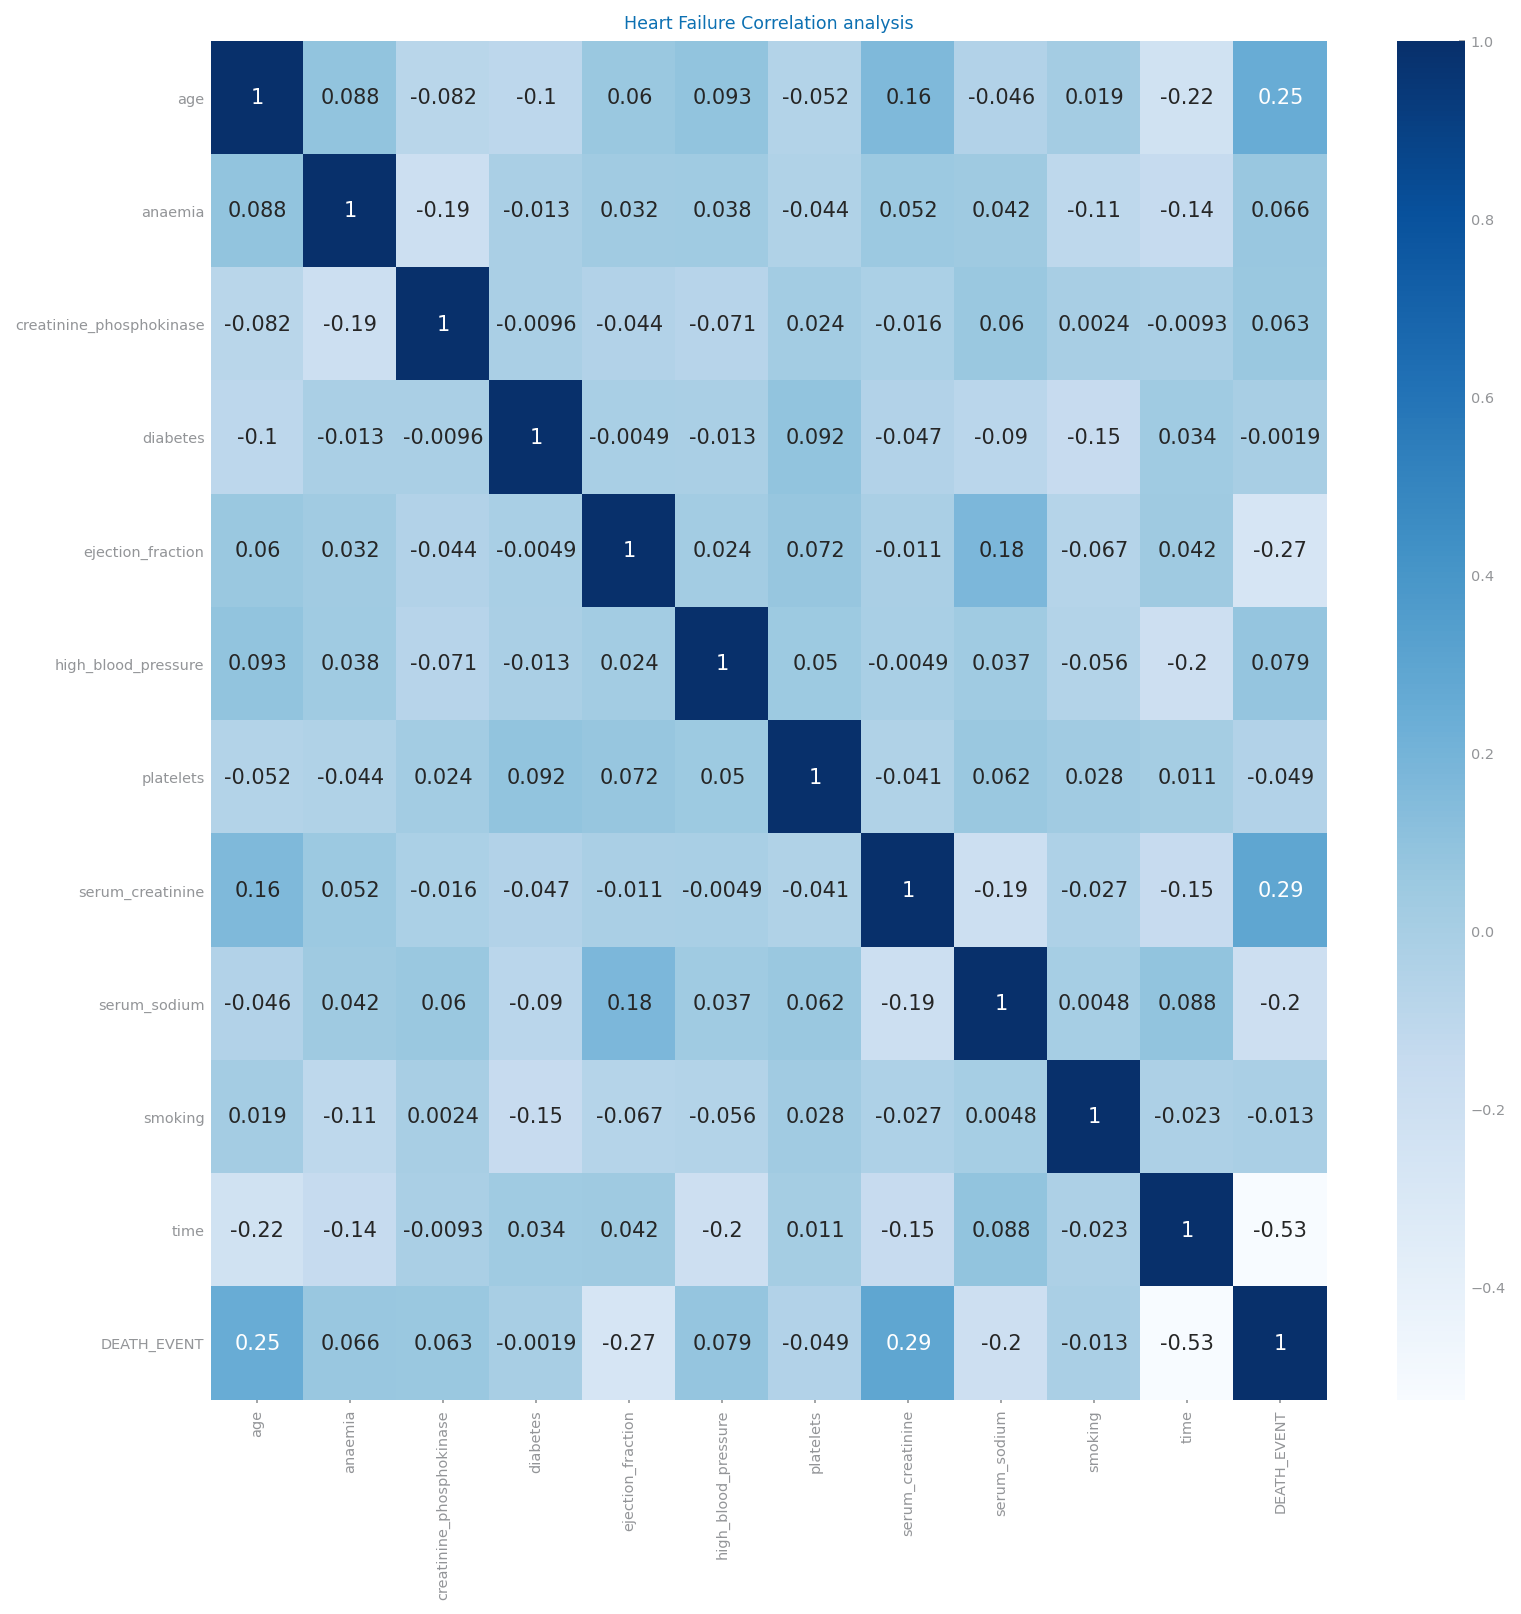

In [3]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = hf_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Heart Failure Correlation analysis')
plt.show()

# Toxicity Dataset

## Sparsity

All of the variables are binary and so there is no sparsity analysis to be done, since the scatterplot will always just show a square.

## Correlation

In [4]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

cp_data = t_data.copy()
most_cor_25 = get_top_abs_correlations(cp_data.drop(columns=['toxic']), 25)
print(most_cor_25)
most_cor = most_cor_25[:7]
print("done")

414  759    0.981486
685  871    0.975301
260  683    0.972504
758  871    0.971219
456  819    0.970810
288  960    0.970227
646  758    0.969676
178  405    0.969388
116  408    0.967029
349  424    0.964966
685  758    0.964156
646  871    0.962571
467  473    0.960607
78   758    0.959788
465  656    0.957170
78   871    0.956573
     646    0.955330
46   53     0.955251
646  685    0.954461
78   685    0.951770
383  657    0.950921
168  749    0.945064
646  905    0.939384
758  905    0.938702
16   473    0.935436
dtype: float64
done


In [5]:
columns_tox = []
for i in range(len(most_cor.index)):
    columns_tox += [most_cor.index[i][0], most_cor.index[i][1]]
columns_tox = sorted(list(dict.fromkeys(columns_tox)))

corr_mtx_toxicity = t_data.corr().loc[columns_tox, columns_tox]
print(corr_mtx_toxicity)

          260       288       414       456       646       683       685  \
260  1.000000 -0.205747 -0.152159  0.749269 -0.205512  0.972504 -0.206163   
288 -0.205747  1.000000  0.830571 -0.209553  0.902769 -0.199202  0.907620   
414 -0.152159  0.830571  1.000000 -0.166543  0.779924 -0.151520  0.780104   
456  0.749269 -0.209553 -0.166543  1.000000 -0.210207  0.747719 -0.210879   
646 -0.205512  0.902769  0.779924 -0.210207  1.000000 -0.198440  0.954461   
683  0.972504 -0.199202 -0.151520  0.747719 -0.198440  1.000000 -0.199090   
685 -0.206163  0.907620  0.780104 -0.210879  0.954461 -0.199090  1.000000   
758 -0.205428  0.908229  0.784074 -0.210263  0.969676 -0.198352  0.964156   
759 -0.152263  0.839047  0.981486 -0.166185  0.785778 -0.151624  0.788269   
819  0.739349 -0.201573 -0.167996  0.970810 -0.200154  0.735757 -0.201827   
871 -0.205545  0.915577  0.788622 -0.211100  0.962571 -0.198464  0.975301   
960 -0.206332  0.970227  0.837457 -0.211494  0.905788 -0.200367  0.911081   

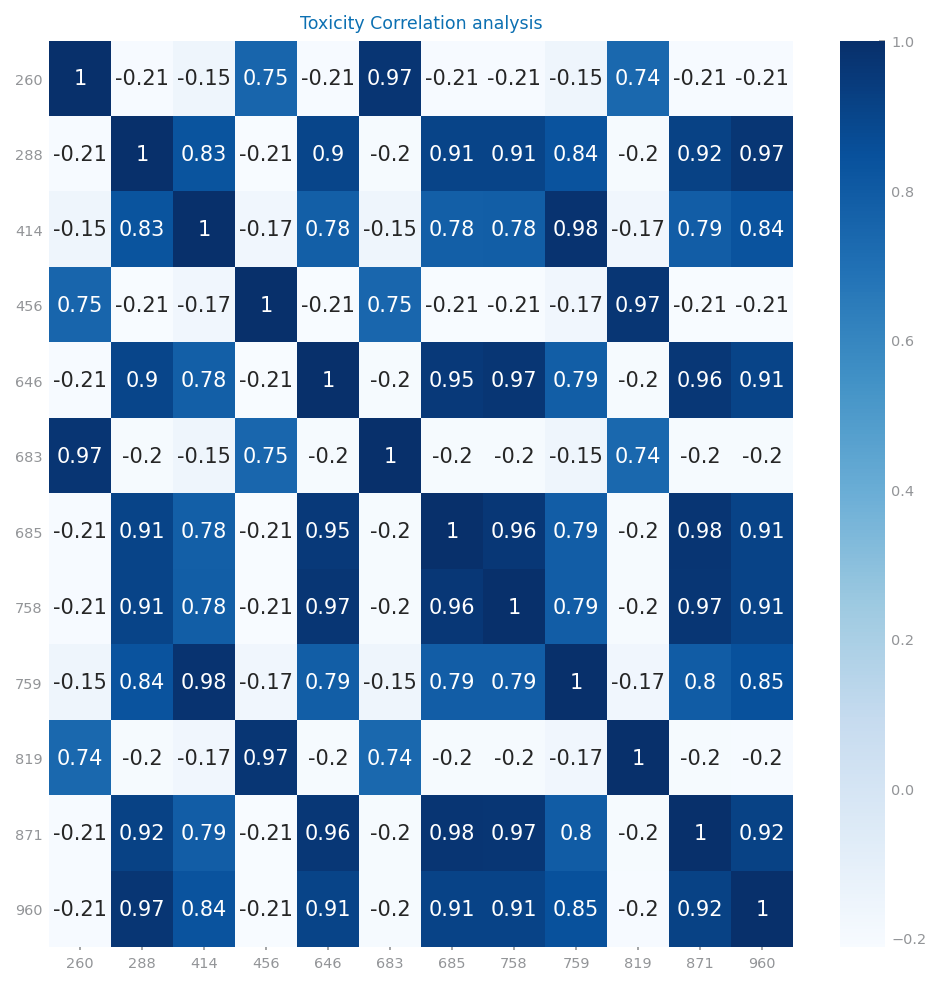

In [6]:
fig = plt.figure(figsize=(8, 8))
sns.heatmap(corr_mtx_toxicity, xticklabels=columns_tox, yticklabels=columns_tox, annot=True, cmap='Blues')
plt.yticks(rotation=0)
plt.title('Toxicity Correlation analysis')
plt.show()